In [0]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

root = r"/content/gdrive/My Drive/Puc/Projeto Final"

In [0]:
!7za x '{root}/Datasets/decistion_tree/teste_all.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 2206908 bytes (2156 KiB)

Extracting archive: teste_all.7z
--
Path = teste_all.7z
Type = 7z
Physical Size = 2206908
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

  0%     15% - teste_all.csv                     32% - teste_all.csv                     49% - teste_all.csv                     63% - teste_all.csv                     77% - teste_all.csv                     90% - teste_all.csv                    Everything is Ok

Size:       522764937
Compressed

In [0]:
from sklearn import tree
from sklearn.metrics import precision_score, balanced_accuracy_score
import pandas as pd
import numpy as np

In [0]:
full = pd.read_csv("teste_debug.csv",header=None).dropna()

In [0]:
def plot(clf):
  import graphviz 
  dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      filled=True, rounded=True,  
                      special_characters=True)  
  graph = graphviz.Source(dot_data)
  return graph

def get_dt(X, Y, max_depth=None,max_leaf_nodes=None):
  clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=1)
  return clf.fit(X,Y)

In [0]:
Y = full.iloc[:,-1]
X = full.iloc[:,:-1]

In [17]:
dt_5N = get_dt(X.astype(str) + 'a', Y, 5, None)
dt_58 = get_dt(X.astype(str) + 'a', Y, 5, 8)

ValueError: ignored

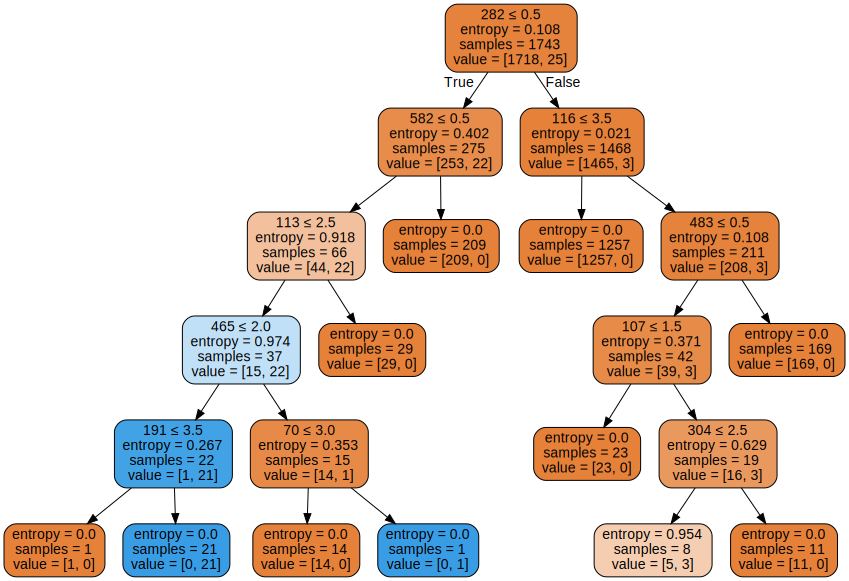

In [13]:
plot(dt_5N)

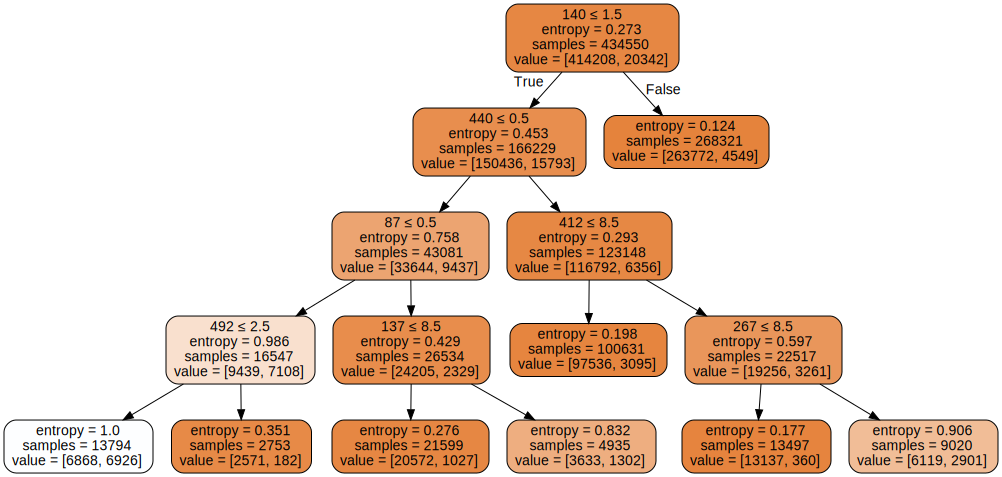

In [0]:
plot(dt_58)

In [0]:
balanced_accuracy_score(Y[3000:5000], dt_5N.predict(X[3000:5000]))

0.6139006342494715

In [0]:
balanced_accuracy_score(Y[3000:5000], dt_58.predict(X[3000:5000]))

0.6099365750528541

In [0]:
(dt_58.predict(X[3000:5000]) != dt_5N.predict(X[3000:5000])).sum()

15

In [0]:
k = set([frozenset(x) for x in templates[1]])

In [0]:
k.add(frozenset([7]))

In [0]:
from graphviz import Digraph